In [2]:
import numpy as np

try:
    from modAL.models import ActiveLearner
except:
    !pip3 install modAL

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
n_initial = 100
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

#random index from training set
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

#select random samples
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

print('Pool: ', X_pool.shape)
print('Init: ', X_initial.shape)

Pool:  (1247, 64)
Init:  (100, 64)


In [12]:
# Use Gaussian navie bayes for classifier
learner = ActiveLearner(
    estimator=GaussianNB(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

Query  990 / 1000
[0]
[0]


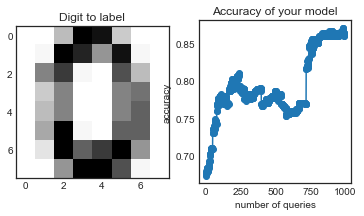

In [13]:
n_queries = 1000
accuracy_scores = [learner.score(X_test, y_test)]
for i in range(n_queries):
    query_idx, query_inst = learner.query(X_pool)
    y_new = y_pool[query_idx]#np.array([int(input())], dtype=int)
    if i % 10 == 0:
      display.clear_output(wait=True)
      print("Query ", i, "/", n_queries)
      print(query_idx)
      #print(query_inst)
      print(y_new)
      with plt.style.context('seaborn-white'):
          plt.figure(figsize=(6, 3))
          plt.subplot(1, 2, 1)
          plt.title('Digit to label')
          plt.imshow(query_inst.reshape(8, 8))
          plt.subplot(1, 2, 2)
          plt.title('Accuracy of your model')
          plt.plot(range(i+1), accuracy_scores)
          plt.scatter(range(i+1), accuracy_scores)
          plt.xlabel('number of queries')
          plt.ylabel('accuracy')
          display.display(plt.gcf())
          plt.close('all')

    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

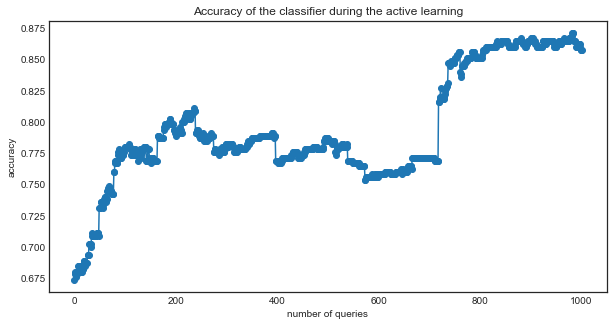

In [14]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()

In [15]:
print("- The first acc: {}\n- The last acc: {}".format(accuracy_scores[0], accuracy_scores[-1]))

- The first acc: 0.6733333333333333
- The last acc: 0.8577777777777778
